# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,precision_score,precision_recall_curve,f1_score,fbeta_score,accuracy_score
from sklearn.svm import SVC

#set plot style
plt.style.use('ggplot')


#set fomt for all plot

plt.rcParams['font.size'] =12
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Amount_Distribution.png',
 'corr heatmap.png',
 'credit-card-fraud-detection-a-hands-on-project.ipynb',
 'creditcard.csv',
 'credit_card_fraud_detection.ipynb',
 'Fraud VS Non-Fradulent.png',
 'Time_distribution.png',
 'Untitled.ipynb',
 'Untitled1.ipynb']

# 1- Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


We can only work with three non-transformed variables which are Time, Amount, and Class (where Class takes values of 1 for fraud and 0 for not fraud).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


From the plot, we can observe that the Time feature has a bimodal distribution with two peaks, indicating that there are two periods during the day when credit card transactions are more frequent. The first peak occurs at around 50,000 seconds (approximately 14 hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours). This suggests that there may be a pattern in the timing of credit card transactions that could be useful for fraud detection.

C:\Users\saura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


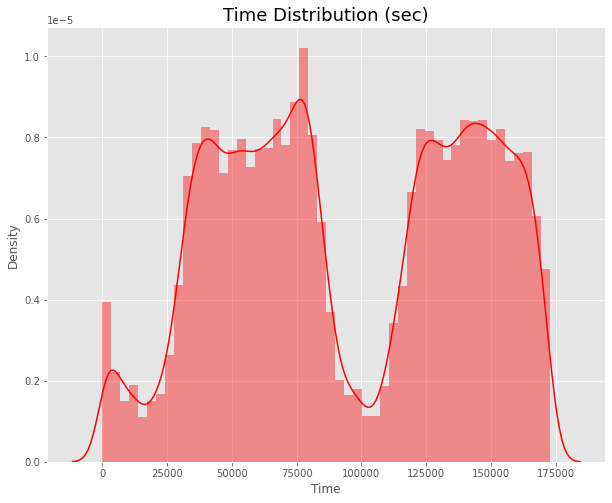

In [6]:
plt.figure(figsize=(10,8))
plt.title('Time Distribution (sec)')
sns.distplot(df['Time'],color='red')

#save the plot as png file

plt.savefig('Time_distribution.png')

From the plot, we can observe that the distribution of the Amount feature is highly skewed to the right, with a long tail to the right. This indicates that the majority of the transactions have low amounts, while a few transactions have extremely high amounts. As a result, this suggests that the dataset contains some outliers in terms of transaction amounts. Therefore, when building a model for fraud detection, it may be necessary to handle outliers in the `Amount` feature, for instance, by using a log transformation or robust statistical methods.

C:\Users\saura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


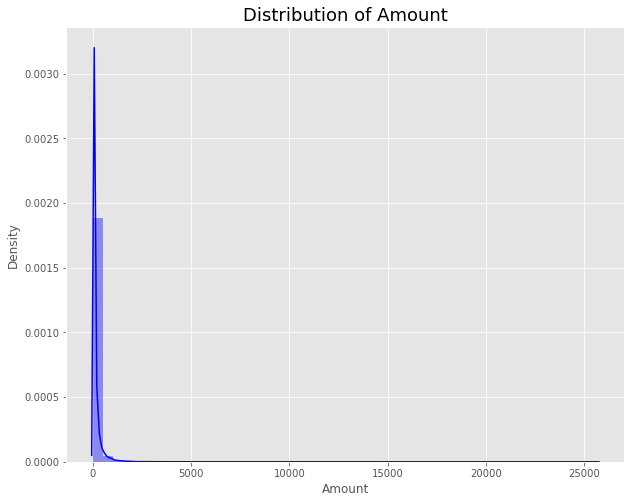

In [7]:
#plotting distribution for amount feactures 
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='red')

#save the plot as png file
plt.savefig('Amount_Distribution.png')

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#counting number of fraud vs non fraud transaction and display the ratio

fraud = df['Class'].value_counts()[1]
nonfraud =df['Class'].value_counts()[0]

print('Fradulent ',fraud ,'Non-Fraudulent',nonfraud)
print('The ratio of fraud to non fraud :',fraud/nonfraud)

Fradulent  492 Non-Fraudulent 284315
The ratio of fraud to non fraud : 0.0017304750013189597


From the plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

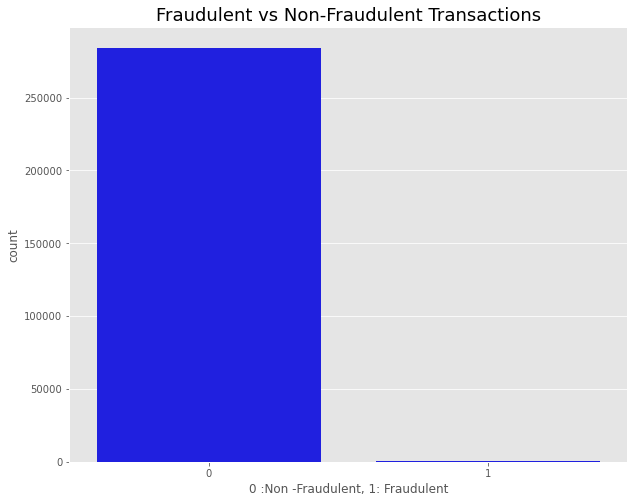

In [10]:
#plotting count of fraud and non-fraud transactions in bar chart

plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('count')
plt.xlabel('0 :Non -Fraudulent, 1: Fraudulent')

#save the plot as png file
plt.savefig('Fraud VS Non-Fradulent.png')

# 2 - Data Preproocessing


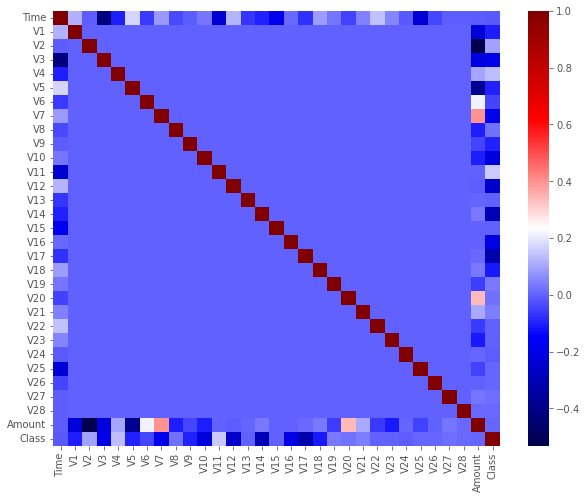

<Figure size 432x288 with 0 Axes>

In [11]:
#plottinh heatmsp to check correlation coefficients
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=False,cmap='seismic')
plt.show()

plt.savefig("corr heatmap.png")

Time and V3, with a correlation coefficient of -0.42
Amount and V2, with a correlation coefficient of -0.53
Amount and V4, with a correlation coefficient of 0.4.

# 3 Model Building


In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
#drop class column to prepare data for splitting

x= df.drop(columns=['Class'])

y =df['Class']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc= StandardScaler()

x = sc.fit_transform(x)

In [16]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,ConfusionMatrixDisplay

In [18]:
from sklearn.metrics import roc_curve,roc_auc_score,recall_score

In [19]:
results = pd.DataFrame(columns=['Model name','Accuracy','F1 Score','ROC'])

In [20]:
# ROC Curve function

def draw_roc(actual,probs):
    fpr,tpr,thresholds = roc_curve(actual,probs,drop_intermediate=False)
    auc_score = roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)'  % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Reciever operating characteristic example')
    plt.legend(loc ='lower right')
    plt.show()
    
    return None

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression(C=0.01)

In [22]:

logistic_model=lg.fit(xtrain,ytrain)

In [23]:
def display_test_results (model_name,model):
    ypred =model.predict(xtest)
    
    #confusion matrix
    c_matrix =confusion_matrix(ytest,ypred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    
    
    #classification Report
    
    print('--------------------Çlassification report----------')
    print(classification_report(ytest,ypred))
    
    print('-----------specific classification report----------')
    
    TP = c_matrix[1,1]
    TN = c_matrix[0,0]
    FP = c_matrix[0,1]
    FN = c_matrix[1,0]
    
    #Accuracy
    print('Accuracy :',accuracy_score(ytest,ypred))
    
    #Recall Sensitivity (TP /float(TP+FN)) 
    print('Recall :-',recall_score(ytest,ypred))
    
    #SPECIFICITY
    print('specificity:',TN/float(TN+FP))
    
    #F1 Score
    print("F1 Score:-",f1_score(ytest,ypred))
    
     
     # Predicted probability
    y_test_pred_proba = model.predict_proba(xtest)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = roc_auc_score(ytest, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(ytest,y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name,accuracy_score(ytest, ypred), f1_score(ytest, ypred), roc_auc]

    return None

[[85294    13]
 [   57    79]]


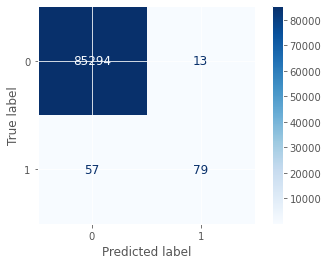

--------------------Çlassification report----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.58      0.69       136

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

-----------specific classification report----------
Accuracy : 0.9991807403766253
Recall :- 0.5808823529411765
specificity: 0.9998476092231587
F1 Score:- 0.6929824561403508
------------------ ROC --------------------


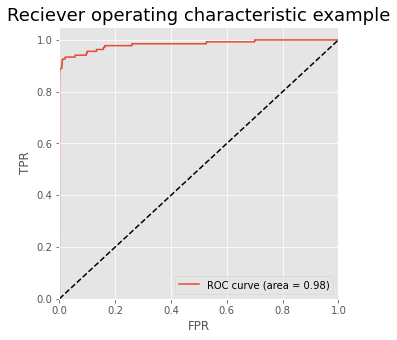

In [24]:
display_test_results("Logistic Regression",logistic_model)

## XGBoost Classifer


In [25]:
#importing xgboost

from xgboost import XGBClassifier

In [26]:
params ={'learning_rate':0.2,
        'max_depth':2,
        'n_estimators':200,
        'subsample':0.9,
        'objective':'binary:logistic'}

In [27]:
xgb_model = XGBClassifier(params =params)
xgb_model.fit(xtrain,ytrain)

[23:39:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

## Prediction result

[[85301     6]
 [   22   114]]


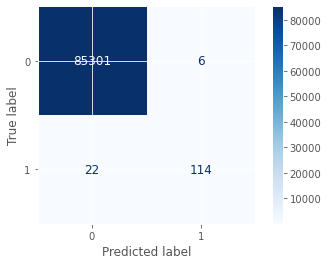

--------------------Çlassification report----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443

-----------specific classification report----------
Accuracy : 0.9996722961506501
Recall :- 0.8382352941176471
specificity: 0.9999296657953041
F1 Score:- 0.890625
------------------ ROC --------------------


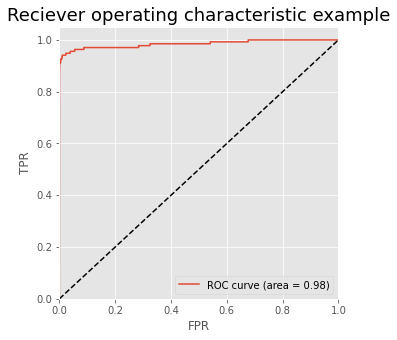

In [28]:
display_test_results("XG Boost",xgb_model)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
dt_model = DecisionTreeClassifier(criterion='gini',random_state=100,
                                 max_depth=5,min_samples_leaf=100,min_samples_split=100)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

## Prediction Result

[[85268    39]
 [   37    99]]


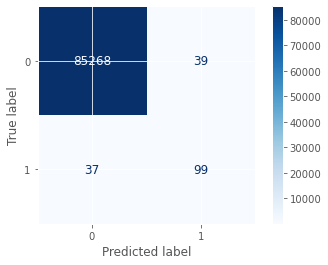

--------------------Çlassification report----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.72      0.73      0.72       136

    accuracy                           1.00     85443
   macro avg       0.86      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

-----------specific classification report----------
Accuracy : 0.9991105181231933
Recall :- 0.7279411764705882
specificity: 0.9995428276694761
F1 Score:- 0.7226277372262774
------------------ ROC --------------------


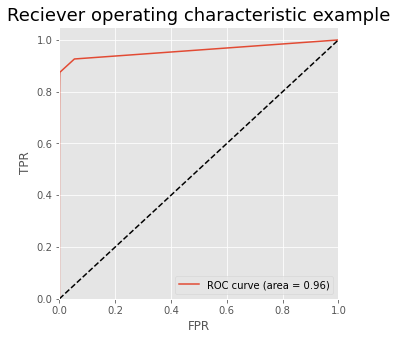

In [31]:
display_test_results("Decision tree",dt_model)

# Random Forest

In [32]:
r_model = RandomForestClassifier(n_estimators=100,bootstrap=True,
                                max_depth=5,
                                min_samples_leaf=50,min_samples_split=50,
                                max_features=10)

In [33]:
r_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

## Prediction Result

[[85282    25]
 [   38    98]]


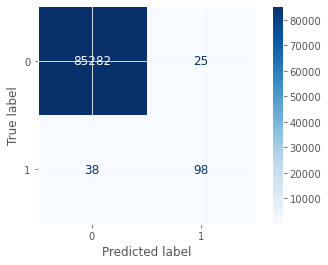

--------------------Çlassification report----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.72      0.76       136

    accuracy                           1.00     85443
   macro avg       0.90      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443

-----------specific classification report----------
Accuracy : 0.9992626663389628
Recall :- 0.7205882352941176
specificity: 0.9997069408137668
F1 Score:- 0.7567567567567567
------------------ ROC --------------------


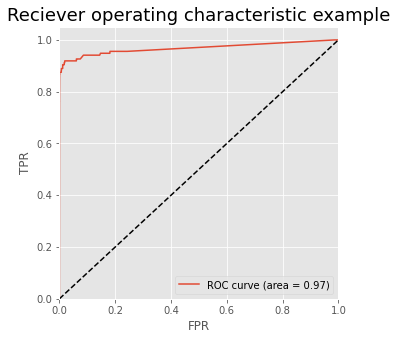

In [34]:
display_test_results("Random Forest",r_model)

## Summary of Data

In [35]:
results.sort_values(by='ROC',ascending=False)

,Model name,Accuracy,F1 Score,ROC
1,XG Boost,0.999672,0.890625,0.984821
0,Logistic Regression,0.999181,0.692982,0.983255
3,Random Forest,0.999263,0.756757,0.968232
2,Decision tree,0.999111,0.722628,0.959610
